## We will be performing the below mentioned key steps to reach the conclusion of our analysis

    - Read and understand the data
    - Outlier analysis and decision based on outlier annalysis
    - Perform PCA and get the data ready
    - Perform the K means clustering
    - Perform the Hierarchical analysis clustering
    - Perform the analysis based on 3 keym etrics (gddp, child mortality, and income)
    - Perform PCA and correlate it with the clusters we are able to find out
    - Recommendation of 5 countries to be given

## 1. Read and understand the data

In [186]:
# import pandas and numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [187]:
#reading the dataset

country_df = pd.read_csv("Country-data.csv")

print(country_df.head())

print(country_df.shape)

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
(167, 10)


#### So there are total 167 records and 10 columns describing those data

In [188]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [189]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### We can observe here that since none of the rows are empty (all have 167 records), we do not need to remove any data from the data set

## 2. Checking for outliers

In [190]:
# checking for outliers

country_df.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### Selecting outlier countries based on all the columns and have them appended into one dataframe

In [191]:
country_df_outlier1 = country_df[country_df.child_mort > 100]

country_df_outlier1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446


In [192]:
country_df_outlier2 = country_df[country_df.exports > 70]
country_df_outlier3 = country_df[country_df.health > 11]
country_df_outlier4 = country_df[country_df.imports > 76]
country_df_outlier5 = country_df[country_df.income > 41220]
country_df_outlier6 = country_df[country_df.inflation > 17]
country_df_outlier7 = country_df[country_df.life_expec > 80]
country_df_outlier8 = country_df[country_df.total_fer > 5.4]
country_df_outlier9 = country_df[country_df.gdpp > 41840]

country_df_outlier = pd.concat([country_df_outlier1,country_df_outlier2,country_df_outlier3,country_df_outlier4,country_df_outlier5,country_df_outlier6,
                               country_df_outlier7,country_df_outlier8,country_df_outlier9])

In [193]:
country_df_outlier.drop_duplicates()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648


In [194]:
country_df_outlier.shape

(153, 10)

#### There are only 167 records and out of which 153 records would consitutite outlier in one form or the other. Since it is important to consider all the variation in data to get a meaningful solution, we are not deleting any records based on outlier analysis

## 3. Perform PCA

### 3.1 Preparing the data for modelling

In [195]:
# Importing some of the important packages

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [196]:
# 1 keeping only the require columns for clustering

country_df_k = country_df[['gdpp','income','child_mort']]

country_df_k.shape

(167, 3)

In [197]:
# 2 re-scaling the variables so that none of them exert more weight on the final model

scaler = StandardScaler()

#fit transform

rfm_df_scaled = scaler.fit_transform(country_df_k)

rfm_df_scaled.shape

(167, 3)

In [198]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)

rfm_df_scaled.columns = ['gdpp','income','child_mort']

rfm_df_scaled.shape

(167, 3)

### 3.2 Perform modelling

In [199]:
# importing the PCA module

from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state = 50)

# Performing the PCA

pca.fit(rfm_df_scaled)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='randomized', tol=0.0, whiten=False)

In [200]:
# list of PCA components

pca.components_

array([[ 0.61429738,  0.62343707, -0.48369924],
       [ 0.37763998,  0.30595439,  0.87394505],
       [-0.69283965,  0.71952632,  0.04748778]])

In [201]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.7630789 , 0.20257426, 0.03434684])

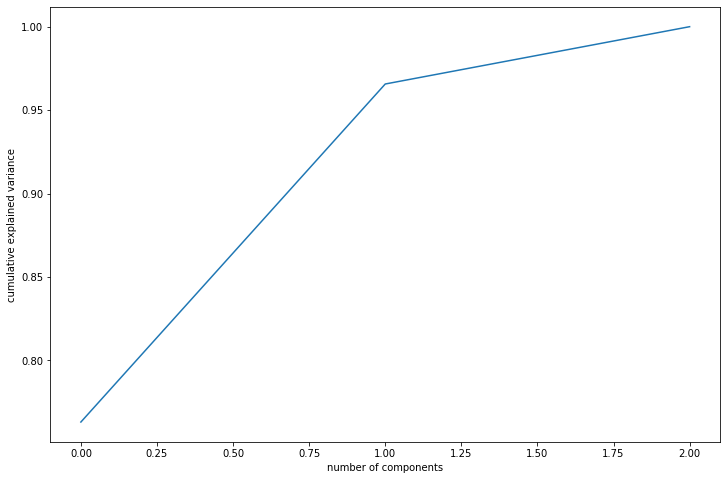

In [202]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### We see that the 96% variation in data can be explained by 2 principle components

In [203]:
# Understanding how the original 3 variables are loaded on the principal components. It can be verified from above as well.

colnames = list(rfm_df_scaled)

pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,gdpp,0.614297,0.377640
1,income,0.623437,0.305954
2,child_mort,-0.483699,0.873945


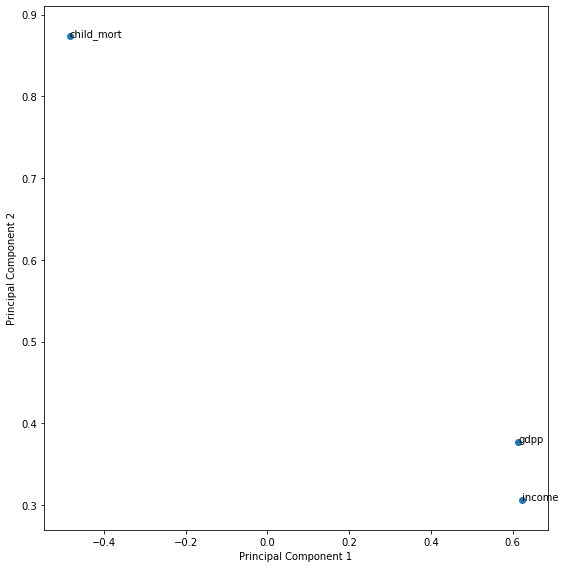

In [204]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [205]:
# Dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [206]:
df_pca = pca_final.fit_transform(rfm_df_scaled)
df_pca.shape

(167, 2)

In [207]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [208]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [209]:
pcs_df2.head()

,PC1,PC2
0,-1.545850,0.624922
1,-0.271605,-0.769327
2,-0.291604,-0.481997
3,-1.653162,1.380589
4,0.374234,-0.592688


In [210]:
pcs_df2.shape

(167, 2)

In [211]:
pcs_df2

,PC1,PC2
0,-1.545850,0.624922
1,-0.271605,-0.769327
2,-0.291604,-0.481997
3,-1.653162,1.380589
4,0.374234,-0.592688
5,0.246840,-0.547132
6,-0.423637,-0.806002
7,2.498433,0.464325
8,2.394680,0.378394
9,-0.287864,-0.145593


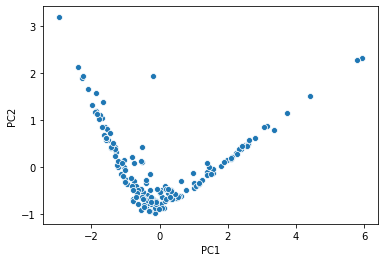

In [212]:
#Visualising the points on the PCs.

sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

#### We can see that some of the distinct clusters are available, hence we can go ahead with clustering

## 4. Perform K means clustering

### 4.1 Calculate Hopkins statistic

In [213]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(pcs_df2)

0.9099790979274591

#### Since the hopkins statistics is> 0.7 we can conclude that the dataset has a good tendency to form clusters

In [214]:
dat3_1 = pcs_df2

### 4.2 Checking Silhoutte score

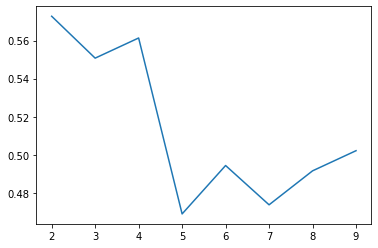

In [215]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### From the above mentioned graph, we notice that for both 2 and 4 clusters we see a good score. We will check the score from elbow analysis and decide the number of clusters accordingly

### 4.3 Checking Elbow Curve method

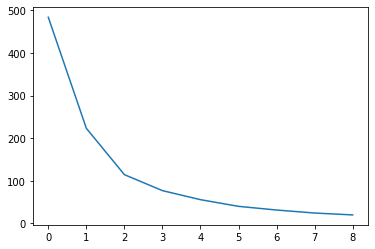

In [216]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### We notice that the bend around 2 is the last jerk that we are seeing, after which we notice a gradual slope. Hence we will be considering only 2 clusters

### 4.3 Performing K means clustering using K = 2

In [217]:
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [218]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']
dat_km

,PC1,PC2,ClusterID
0,-1.545850,0.624922,1
1,-0.271605,-0.769327,1
2,-0.291604,-0.481997,1
3,-1.653162,1.380589,1
4,0.374234,-0.592688,1
5,0.246840,-0.547132,1
6,-0.423637,-0.806002,1
7,2.498433,0.464325,0
8,2.394680,0.378394,0
9,-0.287864,-0.145593,1


In [219]:
dat_km['ClusterID'].value_counts()

1    129
0     38
Name: ClusterID, dtype: int64

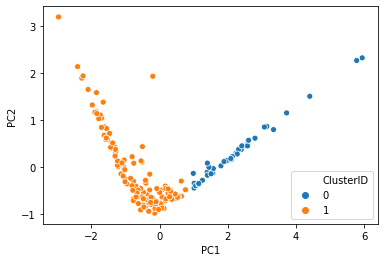

In [220]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

### We are ok to use two clusters, however, we can actually differentiate the countries into three clusters and would therefore like to see 3 clusters. Depending on th results we get from 3 clusters, we will decide which cluster to go ahead with

### Performing K means clustering using K = 3

In [221]:
model_clus3 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus3.fit(dat3_1)

dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus3.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']

dat_km['ClusterID'].value_counts()

2    91
1    45
0    31
Name: ClusterID, dtype: int64

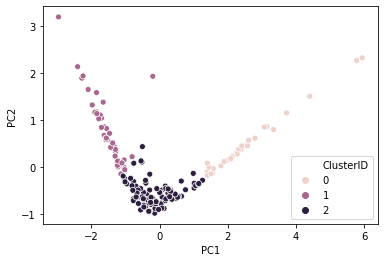

In [222]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

### We notice that even though cluster 2 was good from elbow curve and silhoutte perspective, cluster 3 gives us meaningful insights and is easier to explain to the client. This way we can dub the 3 clusters into either under- developed, developing and developed countries. These are some of the terms a normal layman would know and understand and hence would be benefiatial to use K = 3

In [223]:
dat5=pd.merge(country_df,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1.545850,0.624922,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.271605,-0.769327,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.291604,-0.481997,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.653162,1.380589,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.374234,-0.592688,2


In [224]:
dat6 = dat5[['country','child_mort','gdpp','income','ClusterID']]

dat5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,-1.545850,0.624922,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,-0.271605,-0.769327,2
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,-0.291604,-0.481997,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,-1.653162,1.380589,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0.374234,-0.592688,2
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0.246840,-0.547132,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,-0.423637,-0.806002,2
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,2.498433,0.464325,0
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,2.394680,0.378394,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,-0.287864,-0.145593,2


#### Performing visualisations on the dataframe as per the instructions

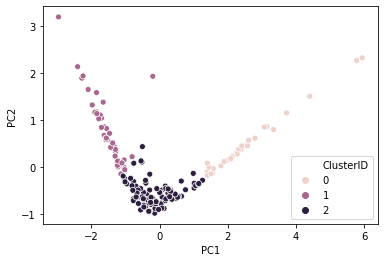

In [225]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat5)

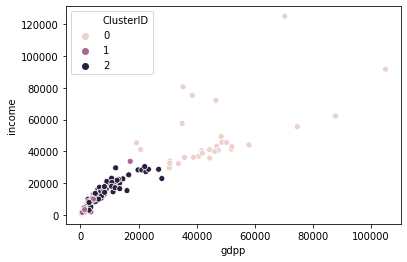

In [226]:
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=dat5)

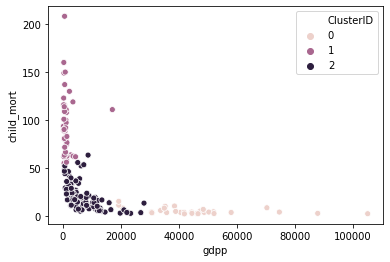

In [227]:
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=dat5)

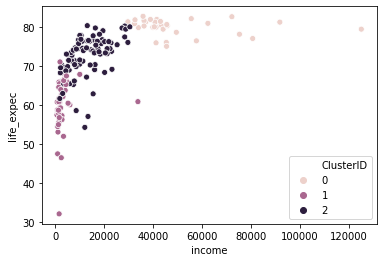

In [228]:
sns.scatterplot(x='income',y='life_expec',hue='ClusterID',legend='full',data=dat5)

#### Finding the mean of each variable based on Cluster ID

In [229]:
child_mort_mean = pd.DataFrame(dat5.groupby(['ClusterID']).child_mort.mean())

gdpp_mean = pd.DataFrame(dat5.groupby(['ClusterID']).gdpp.mean())

income_mean = pd.DataFrame(dat5.groupby(['ClusterID']).income.mean())

In [230]:
df1 = pd.merge(child_mort_mean,gdpp_mean,on='ClusterID',how = 'left')

df2 = pd.merge(df1,income_mean,on='ClusterID',how = 'left')

df2

,child_mort,gdpp,income
ClusterID,,,
0,5.648387,45677.419355,49616.129032
1,95.368889,1445.777778,3144.511111
2,21.147253,7515.978022,13006.153846


#### We can observe the following from the data above -

    - Cluster 0 - Has low child mortality, high gddp and high income (Developed)
    - Cluster 1 - Has high child mortality, low gddp and low income (under developed)
    - Cluster 2 - Has medium child mortality, medium gddp and medium income (Developing)
    

#### Now to identify the top 5 countries which require the most help, we can select the countries which are less than the lowest mean amongst the three clusters

In [231]:
fin1 = country_df[country_df['child_mort']>96]
fin2 = country_df[country_df['gdpp']<=1445]
fin3 = country_df[country_df['income']<=3144]


In [232]:
fin4 =fin1.sort_values(by = ["child_mort"],axis = 0,ascending = False)
fin5 =fin2.sort_values(by = ["gdpp"],axis = 0,ascending = True)
fin6 =fin3.sort_values(by = ["income"],axis = 0,ascending = True)

#### Now that we have identified the countries with the greatest need and have sorted them

In [233]:
fin4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [234]:
fin5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [235]:
fin6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


## 5. Perform Hierarchical clustering

In [236]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 5.1 Single Linkage

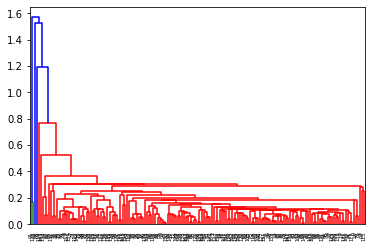

In [237]:
mergings = linkage(pcs_df2,method = "single",metric = "euclidean")
dendrogram(mergings)
plt.show()

### 5.2 Complete Linkage

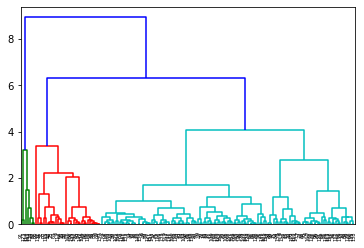

In [238]:
mergings = linkage(pcs_df2,method = "complete",metric = "euclidean")
dendrogram(mergings)
plt.show()

In [239]:
# taking out 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels.shape

(167,)

In [240]:
dat5['Cluster_labels'] = cluster_labels

dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID,Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1.545850,0.624922,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.271605,-0.769327,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.291604,-0.481997,2,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.653162,1.380589,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.374234,-0.592688,2,1


In [241]:
dat5['Cluster_labels'].value_counts()

1    127
0     33
2      7
Name: Cluster_labels, dtype: int64

### 5.3 Visualising data based on complete linkage hierarichal clustering

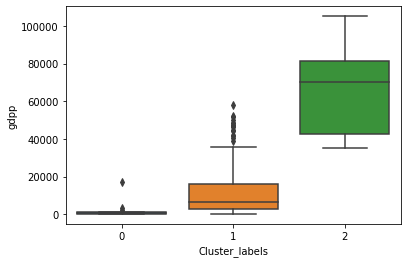

In [242]:
sns.boxplot(x='Cluster_labels',y='gdpp',data = dat5)

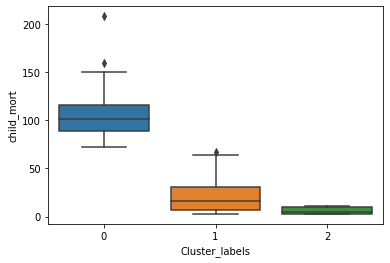

In [243]:
sns.boxplot(x='Cluster_labels',y='child_mort',data = dat5)

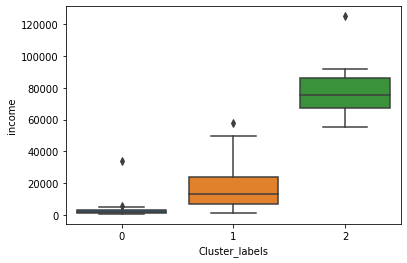

In [244]:
sns.boxplot(x='Cluster_labels',y='income',data = dat5)

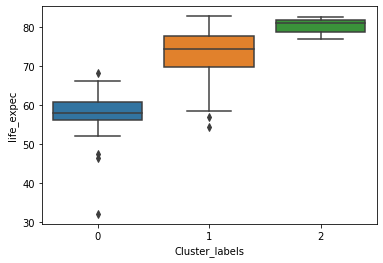

In [245]:
sns.boxplot(x='Cluster_labels',y='life_expec',data = dat5)

In [246]:
child_mort1_mean = pd.DataFrame(dat5.groupby(['Cluster_labels']).child_mort.mean())

gdpp1_mean = pd.DataFrame(dat5.groupby(['Cluster_labels']).gdpp.mean())

income1_mean = pd.DataFrame(dat5.groupby(['Cluster_labels']).income.mean())

df7 = pd.merge(child_mort1_mean,gdpp1_mean,on='Cluster_labels',how = 'left')

df8 = pd.merge(df7,income1_mean,on='Cluster_labels',how = 'left')

df8

,child_mort,gdpp,income
Cluster_labels,,,
0,107.603030,1385.363636,3071.606061
1,22.020472,13080.291339,17318.110236
2,6.228571,65442.857143,80342.857143


#### We can observe the following from the data above -

    - Cluster 0 - Has low child mortality, high gddp and high income (Developed)
    - Cluster 1 - Has medium child mortality, medium gddp and medium income (Developing)
    - Cluster 2 - Has high child mortality, low gddp and low income (under developed)
    

In [247]:
fin7 = country_df[country_df['child_mort']>108]
fin8 = country_df[country_df['gdpp']<=1385]
fin9 = country_df[country_df['income']<=3070]

fin10 =fin7.sort_values(by = ["child_mort"],axis = 0,ascending = False)
fin11 =fin8.sort_values(by = ["gdpp"],axis = 0,ascending = True)
fin12 =fin9.sort_values(by = ["income"],axis = 0,ascending = True)

In [248]:
fin10.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [249]:
fin11.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


In [250]:
fin12.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


## 6. Final list of companies to be considered for aid

### The following companies should be considered for aid after considering both K means clustering and Hierarchical clustering

    - Sierra Leone
    - Congo, Dem. Rep.
    - Liberia
    - Burundi
    - Central African Repubic